In [1]:
# Data Loading Preparation
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from datetime import datetime

In [2]:
# Set display options
pd.set_option('display.max_columns', None)
sns.set_style('whitegrid')
plt.rcParams['figure.figsize'] = (12, 6)
   
print("✅ Libraries imported successfully!")
print(f"Pandas version: {pd.__version__}")
print(f"NumPy version: {np.__version__}")

✅ Libraries imported successfully!
Pandas version: 2.1.3
NumPy version: 1.26.2


**STEP 1 : DATA EXPLORATION**

In [4]:
# Load weather data
weather_df = pd.read_csv(r'C:\Users\Subramani mokkala\OneDrive\Desktop\Subbu\Projects\urban-flood-prediction\data\raw\new_orleans_weather_2010_2025.csv')

In [5]:
print(f"Dataset shape: {weather_df.shape}")
print(f"\nFirst 5 rows:")
print(weather_df.head())
print(f"\nColumn names:")
print(weather_df.columns.tolist())
print(f"\nData types:")
print(weather_df.dtypes)
print(f"\nMissing values:")
print(weather_df.isnull().sum())

Dataset shape: (5753, 22)

First 5 rows:
       STATION                        NAME        DATE  AWND  PRCP  SNOW  \
0  USW00012916  NEW ORLEANS AIRPORT, LA US  2010-01-01   5.9   0.0   NaN   
1  USW00012916  NEW ORLEANS AIRPORT, LA US  2010-01-02   3.7   0.0   NaN   
2  USW00012916  NEW ORLEANS AIRPORT, LA US  2010-01-03   3.8   0.0   NaN   
3  USW00012916  NEW ORLEANS AIRPORT, LA US  2010-01-04   5.6   0.0   NaN   
4  USW00012916  NEW ORLEANS AIRPORT, LA US  2010-01-05   4.2   0.0   NaN   

   TMAX  TMIN  WT01  WT02  WT03  WT04  WT05  WT06  WT08  WT10  WT11  WT13  \
0  12.2   5.6   1.0   NaN   NaN   NaN   NaN   NaN   1.0   NaN   NaN   1.0   
1  10.6   3.9   NaN   NaN   NaN   NaN   NaN   NaN   NaN   NaN   NaN   NaN   
2   8.3   2.8   NaN   NaN   NaN   NaN   NaN   NaN   NaN   NaN   NaN   NaN   
3   6.1  -1.1   NaN   NaN   NaN   NaN   NaN   NaN   NaN   NaN   NaN   NaN   
4   6.1  -2.2   NaN   NaN   NaN   NaN   NaN   NaN   NaN   NaN   NaN   NaN   

   WT14  WT16  WT18  WT21  
0   NaN   1

In [6]:
# Detailed data inspection
print("="*70)
print("DETAILED DATA ANALYSIS")
print("="*70)

# Date range
weather_df['date'] = pd.to_datetime(weather_df['DATE'])
print(f"\n📅 Date Range: {weather_df['date'].min().date()} to {weather_df['date'].max().date()}")
print(f"📊 Total days: {len(weather_df)}")

# Precipitation analysis (MOST IMPORTANT!)
print("\n" + "="*70)
print("PRECIPITATION ANALYSIS")
print("="*70)
print(f"Mean daily precipitation: {weather_df['PRCP'].mean():.2f} mm")
print(f"Maximum precipitation: {weather_df['PRCP'].max():.2f} mm")
print(f"Days with rain (PRCP > 0): {(weather_df['PRCP'] > 0).sum()} ({(weather_df['PRCP'] > 0).mean()*100:.1f}%)")
print(f"Days with heavy rain (>10mm): {(weather_df['PRCP'] > 10).sum()}")
print(f"Days with very heavy rain (>25mm): {(weather_df['PRCP'] > 25).sum()}")
print(f"Days with extreme rain (>50mm): {(weather_df['PRCP'] > 50).sum()}")

# Temperature analysis
print("\n" + "="*70)
print("TEMPERATURE ANALYSIS")
print("="*70)
print(f"Average max temperature: {weather_df['TMAX'].mean():.1f}°C")
print(f"Average min temperature: {weather_df['TMIN'].mean():.1f}°C")
print(f"Hottest day: {weather_df['TMAX'].max():.1f}°C")
print(f"Coldest day: {weather_df['TMIN'].min():.1f}°C")

# Weather type codes - which ones actually occur?
print("\n" + "="*70)
print("WEATHER EVENTS FREQUENCY")
print("="*70)
wt_cols = [col for col in weather_df.columns if col.startswith('WT')]
for wt in wt_cols:
    count = weather_df[wt].notna().sum()
    if count > 0:
        print(f"{wt}: {count} days ({count/len(weather_df)*100:.1f}%)")

# Missing values in core variables
print("\n" + "="*70)
print("MISSING DATA IN CORE VARIABLES")
print("="*70)
core_vars = ['PRCP', 'TMAX', 'TMIN', 'AWND']
for var in core_vars:
    missing = weather_df[var].isnull().sum()
    print(f"{var}: {missing} missing ({missing/len(weather_df)*100:.1f}%)")

DETAILED DATA ANALYSIS

📅 Date Range: 2010-01-01 to 2025-10-01
📊 Total days: 5753

PRECIPITATION ANALYSIS
Mean daily precipitation: 4.53 mm
Maximum precipitation: 220.20 mm
Days with rain (PRCP > 0): 1833 (31.9%)
Days with heavy rain (>10mm): 711
Days with very heavy rain (>25mm): 344
Days with extreme rain (>50mm): 107

TEMPERATURE ANALYSIS
Average max temperature: 26.6°C
Average min temperature: 17.5°C
Hottest day: 40.6°C
Coldest day: -6.6°C

WEATHER EVENTS FREQUENCY
WT01: 2332 days (40.5%)
WT02: 256 days (4.4%)
WT03: 1330 days (23.1%)
WT04: 9 days (0.2%)
WT05: 11 days (0.2%)
WT06: 2 days (0.0%)
WT08: 1011 days (17.6%)
WT10: 14 days (0.2%)
WT11: 4 days (0.1%)
WT13: 417 days (7.2%)
WT14: 60 days (1.0%)
WT16: 429 days (7.5%)
WT18: 2 days (0.0%)
WT21: 99 days (1.7%)

MISSING DATA IN CORE VARIABLES
PRCP: 7 missing (0.1%)
TMAX: 0 missing (0.0%)
TMIN: 0 missing (0.0%)
AWND: 40 missing (0.7%)


In [7]:
# Load flood events data
floods_df = pd.read_csv(r'C:\Users\Subramani mokkala\OneDrive\Desktop\Subbu\Projects\urban-flood-prediction\data\raw\new_orleans_flood_events_2010_2025.csv')

print("="*70)
print("FLOOD EVENTS DATA")
print("="*70)
print(f"Total flood events: {len(floods_df)}")
print(f"\nColumns:")
print(floods_df.columns.tolist())
print(f"\nFirst 5 events:")
print(floods_df.head())

# Try to identify the date column
date_cols = [col for col in floods_df.columns if 'DATE' in col.upper() or 'TIME' in col.upper()]
print(f"\nDate-related columns: {date_cols}")

FLOOD EVENTS DATA
Total flood events: 163

Columns:
['EVENT_ID', 'CZ_NAME_STR', 'BEGIN_LOCATION', 'BEGIN_DATE', 'BEGIN_TIME', 'EVENT_TYPE', 'MAGNITUDE', 'TOR_F_SCALE', 'DEATHS_DIRECT', 'INJURIES_DIRECT', 'DAMAGE_PROPERTY_NUM', 'DAMAGE_CROPS_NUM', 'STATE_ABBR', 'CZ_TIMEZONE', 'MAGNITUDE_TYPE', 'EPISODE_ID', 'CZ_TYPE', 'CZ_FIPS', 'WFO', 'INJURIES_INDIRECT', 'DEATHS_INDIRECT', 'SOURCE', 'FLOOD_CAUSE', 'TOR_LENGTH', 'TOR_WIDTH', 'BEGIN_RANGE', 'BEGIN_AZIMUTH', 'END_RANGE', 'END_AZIMUTH', 'END_LOCATION', 'END_DATE', 'END_TIME', 'BEGIN_LAT', 'BEGIN_LON', 'END_LAT', 'END_LON', 'EVENT_NARRATIVE', 'EPISODE_NARRATIVE', 'ABSOLUTE_ROWNUMBER']

First 5 events:
   EVENT_ID   CZ_NAME_STR BEGIN_LOCATION  BEGIN_DATE  BEGIN_TIME   EVENT_TYPE  \
0    224783  ORLEANS PAR.    NEW ORLEANS  04/23/2010        1358  Flash Flood   
1    226257  ORLEANS PAR.    NEW ORLEANS  05/16/2010         947  Flash Flood   
2    364487  ORLEANS PAR.    NEW ORLEANS  04/03/2012        2330  Flash Flood   
3    364507  ORLEANS

MERGING WEATHER AND FLOOD DATA

In [8]:
# Process flood events to get unique flood dates
print("="*70)
print("CREATING FLOOD TARGET VARIABLE")
print("="*70)

# Convert flood dates to datetime
floods_df['flood_date'] = pd.to_datetime(floods_df['BEGIN_DATE'])

# Get unique flood dates (some days had multiple flood events)
unique_flood_dates = floods_df['flood_date'].dt.date.unique()
print(f"\nTotal flood events: {len(floods_df)}")
print(f"Unique flood days: {len(unique_flood_dates)}")

# Create target variable in weather data
weather_df['flood_event'] = weather_df['date'].dt.date.isin(unique_flood_dates).astype(int)

print(f"\nFlood days marked in weather data: {weather_df['flood_event'].sum()}")
print(f"Non-flood days: {(weather_df['flood_event'] == 0).sum()}")
print(f"Flood event rate: {weather_df['flood_event'].mean()*100:.2f}%")

# Check: How much rain on flood days vs non-flood days?
print("\n" + "="*70)
print("PRECIPITATION ON FLOOD vs NON-FLOOD DAYS")
print("="*70)
flood_days_precip = weather_df[weather_df['flood_event'] == 1]['PRCP']
non_flood_days_precip = weather_df[weather_df['flood_event'] == 0]['PRCP']

print(f"\nFlood days:")
print(f"  Mean precipitation: {flood_days_precip.mean():.2f} mm")
print(f"  Median precipitation: {flood_days_precip.median():.2f} mm")
print(f"  Max precipitation: {flood_days_precip.max():.2f} mm")

print(f"\nNon-flood days:")
print(f"  Mean precipitation: {non_flood_days_precip.mean():.2f} mm")
print(f"  Median precipitation: {non_flood_days_precip.median():.2f} mm")
print(f"  Max precipitation: {non_flood_days_precip.max():.2f} mm")

# Distribution of precipitation on flood days
print("\n" + "="*70)
print("PRECIPITATION RANGES ON FLOOD DAYS")
print("="*70)
print(f"Flood days with 0-10mm rain: {((flood_days_precip >= 0) & (flood_days_precip <= 10)).sum()}")
print(f"Flood days with 10-25mm rain: {((flood_days_precip > 10) & (flood_days_precip <= 25)).sum()}")
print(f"Flood days with 25-50mm rain: {((flood_days_precip > 25) & (flood_days_precip <= 50)).sum()}")
print(f"Flood days with >50mm rain: {(flood_days_precip > 50).sum()}")

# What about flood days with little/no rain? (These are interesting!)
low_rain_floods = weather_df[(weather_df['flood_event'] == 1) & (weather_df['PRCP'] < 10)]
print(f"\nFlood days with <10mm rain: {len(low_rain_floods)} (might be from previous days' accumulation)")

CREATING FLOOD TARGET VARIABLE

Total flood events: 163
Unique flood days: 67

Flood days marked in weather data: 67
Non-flood days: 5686
Flood event rate: 1.16%

PRECIPITATION ON FLOOD vs NON-FLOOD DAYS

Flood days:
  Mean precipitation: 44.93 mm
  Median precipitation: 32.50 mm
  Max precipitation: 199.60 mm

Non-flood days:
  Mean precipitation: 4.05 mm
  Median precipitation: 0.00 mm
  Max precipitation: 220.20 mm

PRECIPITATION RANGES ON FLOOD DAYS
Flood days with 0-10mm rain: 18
Flood days with 10-25mm rain: 11
Flood days with 25-50mm rain: 15
Flood days with >50mm rain: 23

Flood days with <10mm rain: 18 (might be from previous days' accumulation)


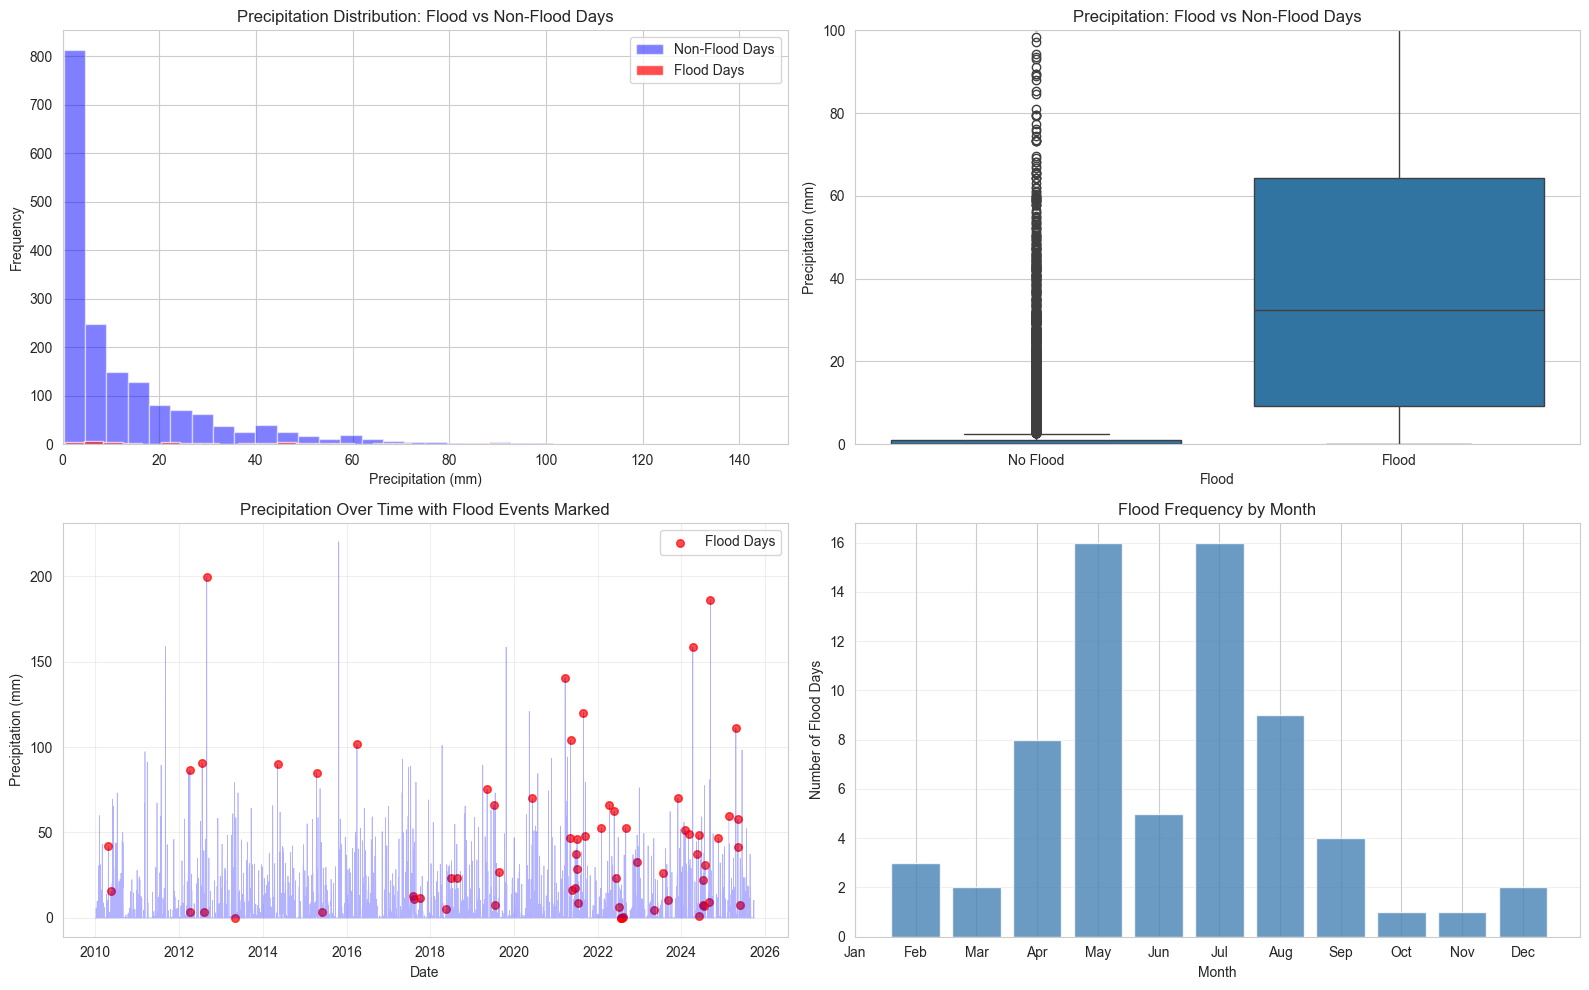

✅ Visualization saved to: results/visualizations/flood_precipitation_analysis.png


In [9]:
# Visualization: Precipitation vs Floods
import matplotlib.pyplot as plt
import seaborn as sns

fig, axes = plt.subplots(2, 2, figsize=(16, 10))

# Plot 1: Precipitation distribution (flood vs non-flood)
axes[0, 0].hist(non_flood_days_precip[non_flood_days_precip > 0], bins=50, alpha=0.5, label='Non-Flood Days', color='blue')
axes[0, 0].hist(flood_days_precip[flood_days_precip > 0], bins=50, alpha=0.7, label='Flood Days', color='red')
axes[0, 0].set_xlabel('Precipitation (mm)')
axes[0, 0].set_ylabel('Frequency')
axes[0, 0].set_title('Precipitation Distribution: Flood vs Non-Flood Days')
axes[0, 0].legend()
axes[0, 0].set_xlim(0, 150)

# Plot 2: Box plot comparison
data_for_box = pd.DataFrame({
    'Precipitation': pd.concat([non_flood_days_precip, flood_days_precip]),
    'Flood': ['No Flood']*len(non_flood_days_precip) + ['Flood']*len(flood_days_precip)
})
sns.boxplot(data=data_for_box, x='Flood', y='Precipitation', ax=axes[0, 1])
axes[0, 1].set_title('Precipitation: Flood vs Non-Flood Days')
axes[0, 1].set_ylabel('Precipitation (mm)')
axes[0, 1].set_ylim(0, 100)

# Plot 3: Time series with flood events marked
axes[1, 0].plot(weather_df['date'], weather_df['PRCP'], alpha=0.3, color='blue', linewidth=0.5)
flood_days_df = weather_df[weather_df['flood_event'] == 1]
axes[1, 0].scatter(flood_days_df['date'], flood_days_df['PRCP'], color='red', s=30, alpha=0.7, label='Flood Days')
axes[1, 0].set_xlabel('Date')
axes[1, 0].set_ylabel('Precipitation (mm)')
axes[1, 0].set_title('Precipitation Over Time with Flood Events Marked')
axes[1, 0].legend()
axes[1, 0].grid(True, alpha=0.3)

# Plot 4: Monthly flood frequency
weather_df['month'] = weather_df['date'].dt.month
monthly_floods = weather_df[weather_df['flood_event'] == 1].groupby('month').size()
axes[1, 1].bar(monthly_floods.index, monthly_floods.values, color='steelblue', alpha=0.8)
axes[1, 1].set_xlabel('Month')
axes[1, 1].set_ylabel('Number of Flood Days')
axes[1, 1].set_title('Flood Frequency by Month')
axes[1, 1].set_xticks(range(1, 13))
axes[1, 1].set_xticklabels(['Jan', 'Feb', 'Mar', 'Apr', 'May', 'Jun', 
                            'Jul', 'Aug', 'Sep', 'Oct', 'Nov', 'Dec'])
axes[1, 1].grid(True, alpha=0.3, axis='y')

plt.tight_layout()
plt.savefig('../results/visualizations/flood_precipitation_analysis.png', dpi=300, bbox_inches='tight')
plt.show()

print("✅ Visualization saved to: results/visualizations/flood_precipitation_analysis.png")